# Repaso (Módulo 1)
> Recordar que el tema principal del módulo 1 son las ecuaciones diferenciales. Entonces, al finalizar este módulo, las competencias principales que deben tener ustedes es
> - Resolver de forma numérica ecuaciones diferenciales ordinarias (EDO) de cualquier orden.
> - Graficar soluciones de dichas EDO en diferentes representaciones.
> - Interpretar o concluir acerca de las gráficas que se obtuvieron.

___
## Ejemplo 1. Recordemos la ecuación logística.
Un modelo popular de crecimiento poblacional de organismos es la llamada **ecuación lógistica**, publicada por Pierre Verhulst en 1838.

$$\frac{dx}{dt} = \mu(x) \; x = r\; (1- x)\; x.$$

En este modelo, $x$ es una variable que representa *cualitativamente* la población. El valor $x=1$ representa la capacidad máxima de población y el valor $x=0$ representa extinción.

Además, $r$ es la tasa de crecimiento máxima de la población.

1.  Dibuje $\mu(x)=r(1-x)$ para $r=1$, e interprete su significado.
2. Para $r=1$ y $x(0)=x_0=0.1$ resuelva numéricamente esta ecuación y grafique $x$ vs. $t$. ¿Qué se puede decir de la población cuando $t\to\infty$?
3. Haga un barrido de $-1\leq r\leq 1$ con pasos de $0.5$, resolviendo la ecuación logística numéricamente cada vez y graficando los resultados en una misma gráfica. ¿Para qué valores de $r$ se tiene crecimiento de la población? ¿Para qué valores se tiene extinción?

In [15]:
# Numeral 1.
# Importar librerías necesarias.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline        
# Permite que las gráficas aparezcan en la misma pantalla y no se desplieguen ventanas emergentes; pertenece a l-3 de código...
# ...pero no me deja agregar comentario en ese línea.

In [16]:
# Definimos la función mu. 
def mu(x, r):
    return r*(1-x)

In [17]:
x = np.linspace(0, 1.2, 50) # Definimos el conjunto de valores en x (de dónde a dónde y con qué paso).

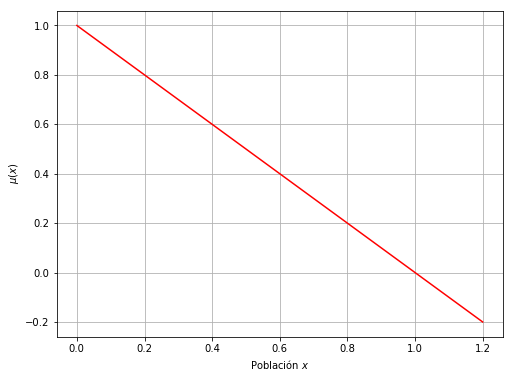

In [32]:
r = 1 # Inicializamos el parámetro solicitado.
plt.figure(figsize = (8, 6)) # Graficar y medidas.
plt.plot(x, mu(x, r), 'r') # Qué vamos a graficar. letra entre comillas al final indica el color de línea.
plt.xlabel('Población $x$') # Dar rótulos a x ($ ayuda a dar formato como matemático).
plt.ylabel('$\mu(x)$') # Dar rótulos a y (\ ayuda a que símbolos matemáticos sean interpretadas como tal, mu por ejemplo).
plt.grid() # Para marcar la cuadrícula.

plt.show() # Permite mostrar la gráfica y no mostrar su ubicación en memoria.

Por la ecuación logística, $\mu(x)$ representa una tasa de crecimiento de la población. Por la gráfica, cuando la población es pequeña esta tasa es máxima y cuando la población está en su tope esta tasa es 0.

In [33]:
# Numeral 2.
from scipy.integrate import odeint  # Importamos librerías para solución numérica de ED


In [34]:
# Definimos la función que nos pide odeint. Odeint pide función, condición inicial y tiempo.
def Elogística(x, t):  
    return r*(1-x)*x
# En Elogística x es la función y t la variable independiente.

x0 = 0.1  # Condición inicial
tt = np.linspace(0, 10) # Paso a 50 por default.
xx = odeint(Elogística, x0, tt) # Solución numérica.

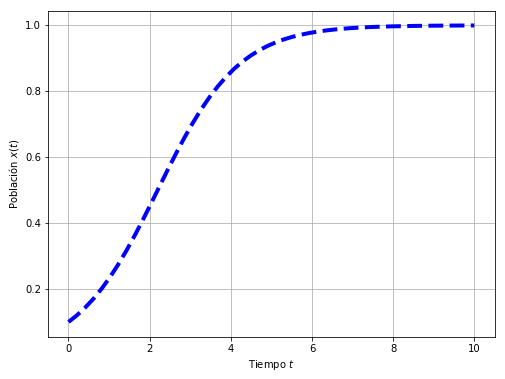

In [35]:
# Graficamos solución.
plt.figure(figsize = (8, 6))
plt.plot(tt, xx, '--b', linewidth = 4) # Primero eje x, luego eje y.
plt.xlabel('Tiempo $t$')
plt.ylabel('Población $x(t)$')
plt.grid()

plt.show()

Con estas condiciones la solución numérica nos muestra que la población tiende a su capacidad máxima cuando $t\to\infty$.

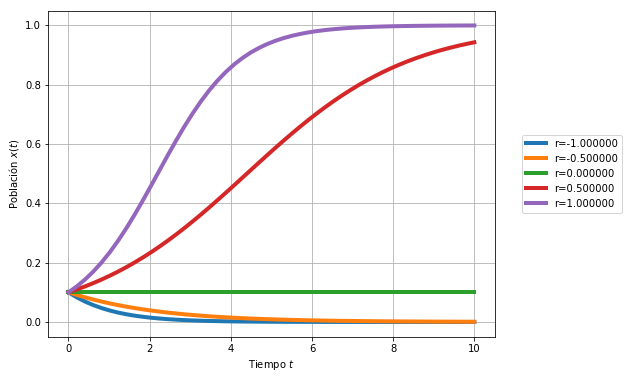

In [37]:
# Numeral 3.
plt.figure(figsize = (8, 6))
# la función arange es exclusiva en su límite externo, por eso ponemos 1.1 en lugar de 1
for r in np.arange(-1, 1.1, 0.5):  
    xx = odeint(Elogística, x0, tt)
    plt.plot(tt, xx, linewidth = 4, label = 'r=%f'%r) # La última instrucción hace que el color sea distinto para cada línea.
plt.xlabel('Tiempo $t$')
plt.ylabel('Población $x(t)$')
plt.legend(loc= 'center left', bbox_to_anchor=(1.05, 0.5)) # Esta instrucción es para conocer qué línea es cual, con leyenda...
# bboxtoanchor indica a partir de qué posición en x inicia el cuadro de leyenda (un poco más allá de donde acaban las líneas)...
# y 0.5 que lo ponga a todo lo ancho de la misma.
plt.grid()

plt.show()


De la gráfica podemos inferir que la población crece hasta su capacidad máxima para $r>0$, se extingue para $r<0$ y permanece constante para $r=0$.

___
## Ejemplo 2. Conejos vs. Ovejas.

Imaginemos que en un mismo ecosistema se encuentran conejos y ovejas. Supongamos, además, que ambas compiten por el mismo alimento (hierba) y que la cantidad total de alimento es limitada. Se ignoran otros factores como depredadores, efectos de temporada (estaciones), y otras fuentes de comida. El modelo de competición entre dos especies **Lotka-Volterra** nos sirve para describir este fenómeno.

Dos fenómenos importantes:
- Cada especie crecería hasta su capacidad máxima en ausencia de la otra especie. Esto se puede modelar con la ecuación logística para cada especie. Los conejos tienen una habilidad soprendente para reproducirse, entonces comparativamente deberían crecer más.
- Cuando conejos y ovejas se encuentran, empieza la competencia. Algunas veces los conejos comen, pero las ovejas (al ser más grandes) ganarán el derecho a la comida la mayoría de las veces. Supondremos que dichos conflictos se dan a una tasa proporcional al tamaño de cada población (si hay dos veces más ovejas, la probabilidad de que un conejo encuentre a una oveja será el doble). Supondremos que dicha competencia disminuirá la tasa de crecimiento ára cada especie, y el efecto será mayor para los conejos.

Con las consideraciones anteriores, un modelo específico es:

\begin{align}
\frac{dx_1}{dt} &= x_1(3-x_1-2x_2)\\
\frac{dx_2}{dt} &= x_2(2-x_2-x_1),
\end{align}

donde $x_1(t)\geq 0$ es la población de conejos al instante $t$ y $x_2(t)\geq 0$ es la población de ovejas al instante $t$. Definimos $x=\left[x_1\quad x_2\right]^T$

Esta selección de coeficientes se tiene para recrear el escenario descrito. Sin embargo, este modelo se puede utilizar para estudiar competición entre especies en general y los coeficientes cambiarán en cada caso.

Simule el sistema para cada una de las siguientes condiciones iniciales. Para cada caso, obtenga gráficas de $x$ vs. $t$, $y$ vs. $t$ y $y$ vs. $x$. ¿Qué pasa con las poblaciones de conejos y de ovejas cuando $t\to\infty$? ¿Pueden coexistir?

1. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [0.5 \quad 1]^T$.
2. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 0.5]^T$.
3. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1.5 \quad 1]^T$.
4. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1.5]^T$.
5. $x(0)=\left[x_1(0)\quad x_2(0)\right]^T = [1 \quad 1]^T$.

In [ ]:
# Resolver acá

Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>